In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("GOOGL_day.csv")
df = df.iloc[::-1]
del df['Unnamed: 0']
df

,volume,open,close,high,low,date
1257,1663302.0,930.985,940.810,944.660,929.7900,2017-07-07 04:00:00
1256,1451460.0,941.950,951.000,953.130,941.9500,2017-07-10 04:00:00
1255,1461247.0,950.520,953.530,954.890,945.1200,2017-07-11 04:00:00
1254,1602115.0,960.860,967.660,969.630,957.0400,2017-07-12 04:00:00
1253,1524571.0,970.800,968.850,978.700,964.8000,2017-07-13 04:00:00
...,...,...,...,...,...,...
4,1235841.0,2231.040,2234.030,2263.205,2217.4501,2022-06-29 04:00:00
3,2158453.0,2200.000,2179.260,2217.760,2135.0000,2022-06-30 04:00:00
2,1773783.0,2158.660,2174.750,2185.000,2134.6100,2022-07-01 04:00:00
1,1970154.0,2142.010,2265.260,2267.535,2114.6300,2022-07-05 04:00:00


In [3]:
df.describe()

,volume,open,close,high,low
count,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000
mean,1.768095e+06,1609.576450,1609.919399,1626.453671,1592.405532
std,8.124995e+05,635.777821,634.939612,641.965373,628.135681
min,4.656380e+05,919.950000,920.870000,928.250000,918.600000
25%,1.259321e+06,1118.110000,1116.962500,1129.475000,1106.775000
50%,1.559065e+06,1293.730000,1296.190000,1305.170000,1289.286300
75%,2.007066e+06,2114.965000,2126.055000,2155.152500,2099.022500
max,6.658855e+06,3025.000000,2996.770000,3030.931500,2977.980000


In [4]:
google_stock = df['close'].values.astype('float32')
google_stock = google_stock.reshape(len(google_stock), 1)
google_stock

array([[ 940.81 ],
       [ 951.   ],
       [ 953.53 ],
       ...,
       [2174.75 ],
       [2265.26 ],
       [2297.594]], dtype=float32)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
google_stock_n = scaler.fit_transform(google_stock)
google_stock_n

array([[0.00960547],
       [0.01451421],
       [0.01573294],
       ...,
       [0.6040175 ],
       [0.64761794],
       [0.6631938 ]], dtype=float32)

In [6]:
def train_test_split(stock):
  train_size = int(len(stock) * 0.80)
  test_size = len(stock) - train_size
  train, test = stock[0:train_size,:], stock[train_size:len(stock),:]
  return train, test

In [7]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
def create_trainTest():
	train, test = train_test_split(google_stock_n)
	# reshape into X=t and Y=t+1
	look_back = 1
	trainX, trainY = create_dataset(train, look_back)
	testX, testY = create_dataset(test, look_back)
	trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
	testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
	return trainX, testX, trainY, testY
trainX, testX, trainY, testY = create_trainTest()


Epoch 1/100
32/32 [==============================] - 2s 2ms/step - loss: 0.0636
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0418
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0214
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 7.9047e-04
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7479e-04
Epoch 13/100
32/32 [=========

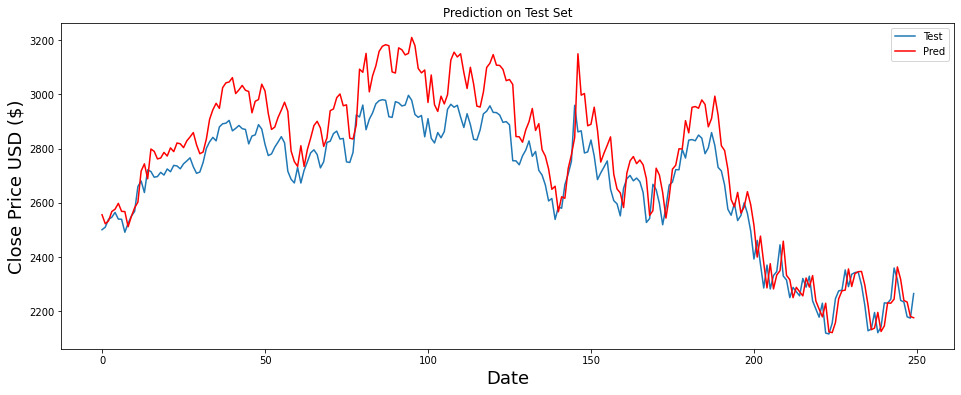

In [14]:
def first_train():
  np.random.seed(1234)
  tf.random.set_seed(1234)
  trainX, testX, trainY, testY = create_trainTest()
  model = Sequential()
  model.add(LSTM(units=50,return_sequences=True,input_shape=(trainX.shape[1], 1), activation = 'relu'))
  model.add(LSTM(units=50,return_sequences=True, activation = 'relu'))
  model.add(LSTM(units=50,return_sequences=True, activation = 'relu'))
  model.add(LSTM(units=50, activation = 'relu'))
  model.add(Dense(units=1))
  model.compile(optimizer='adam',loss='mean_squared_error')
  model.fit(trainX, trainY,epochs=100,batch_size=32)
  model.save('test1.h5')


def evaluate_model():
  trainX, testX, trainY, testY = create_trainTest()

  model = tf.keras.models.load_model('test1.h5')
  model.summary()

  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  # invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  testPredict = scaler.inverse_transform(testPredict)

  #invert train and test Y
  trainY = scaler.inverse_transform([trainY])
  testY = scaler.inverse_transform([testY])

  
  print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], trainPredict[:, 0]))
  print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
  print('Test Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:, 0]))
  print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:, 0])))

  plt.figure(figsize=(16,6))
  plt.title('Prediction on Test Set')
  plt.xlabel('Date', fontsize = 18)
  plt.ylabel('Close Price USD ($)', fontsize=18)
  plt.plot(testY[0])
  plt.plot(testPredict, color = 'red')
  plt.legend(['Test', 'Pred'])
  plt.savefig('eval.png', dpi = 300, bbox_inches = 'tight')
  plt.show()
  
  return model

first_train()
evaluate_model()

To evaluate whether our architecture may overfit the data or not, we do the regular train/test split and evaluate the results on both the training set and test set. That is, our results indicate that the model not only didn't overfit, but also fit the test set well(captures all the movement with some slight errors). We are more confident on using the same architecture for predicting the future